In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize
# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from fig_code.figures import *
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')


# use seaborn plotting defaults
import seaborn as sns; sns.set()

figsize(14, 7)

In [77]:
# Reading csv files
stop = pd.read_csv("/Users/amad/Desktop/495/Audio/stop_data.csv")
go = pd.read_csv("/Users/amad/Desktop/495/Audio/go_data.csv")
up = pd.read_csv("/Users/amad/Desktop/495/Audio/up_data.csv")
down = pd.read_csv("/Users/amad/Desktop/495/Audio/down_data.csv")

In [78]:
# assigning labels
stop["Label"] = "0"
stop.to_csv("stop_data.csv", index=False)
go["Label"] = "1"
go.to_csv("go_data.csv", index=False)
up["Label"] = "2"
up.to_csv("up_data.csv", index=False)
down["Label"] = "3"
down.to_csv("down_data.csv", index=False)

In [79]:
# Merging all csv files and saving it into one csv file
frames = [stop, go, up, down]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv('/Users/amad/Desktop/495/audio.csv', index=False)

In [80]:
# reading combined audio file with all four catagories
audio = pd.read_csv("/Users/amad/Desktop/495/audio.csv")

In [81]:
audio

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,Sample #,Label
0,50.279999,70.739998,71.939995,68.199997,60.359997,54.059998,46.779999,43.879997,33.559998,31.139999,...,0.00,0.00,0.00,0.00,3.62,3.620000,5.100000,3.62,4,3
1,51.320000,53.079998,50.419998,46.500000,44.320000,40.139999,38.139999,33.959999,26.340000,21.100000,...,10.86,13.04,14.02,13.54,13.54,12.000000,10.219999,10.86,11,3
2,58.359997,88.659996,76.459999,78.479996,45.919998,21.400000,5.100000,6.260000,14.920000,18.459999,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,9,2
3,44.619999,53.079998,36.919998,11.440000,10.860000,14.480000,8.080000,0.000000,3.620000,8.860000,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,19,2
4,46.779999,61.639999,81.659996,91.799995,86.639999,90.639999,74.180000,58.480000,48.559998,41.419998,...,0.00,3.62,5.10,3.62,3.62,0.000000,0.000000,0.00,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,141.599991,96.720001,42.059998,20.779999,20.459999,29.619999,31.760000,30.279999,27.320000,25.080000,...,3.62,0.00,0.00,0.00,6.26,9.559999,13.040000,14.92,22,2
96,61.419998,102.259995,120.879997,139.039993,177.500000,166.959991,198.979996,204.339996,195.919998,179.440002,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,21,3
97,45.059998,58.919998,70.479996,61.859997,61.539997,50.020000,39.139999,36.020000,29.179998,23.180000,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,23,1
98,42.680000,44.619999,37.799999,32.980000,29.840000,27.080000,22.020000,18.459999,14.020000,11.440000,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,6,1


In [82]:
# droping label and sample number and assigning it X
X = audio.drop(['Sample #', 'Label'], axis=1)
# Assigning labels to y
y = audio['Label']


In [83]:
# Splitting the data set into (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 64)
(80,)
(20, 64)
(20,)


# Logistic Regression

### Fitting Logistic regression Model

In [84]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.25


In [85]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 2.335
Avg Bias: 1.427
Avg Variance: 0.908
Mean Square error by Sckit-learn lib: 3.000


In [86]:
# Probability of prediction

clf.predict_proba(X_test)

array([[2.84555781e-01, 2.17636631e-01, 4.97791406e-01, 1.61817074e-05],
       [3.62037985e-01, 6.36768367e-01, 2.27791393e-12, 1.19364824e-03],
       [1.32181725e-04, 3.01581385e-08, 9.99866992e-01, 7.95644469e-07],
       [3.63065933e-01, 4.52628711e-01, 2.12714119e-08, 1.84305335e-01],
       [3.97697706e-04, 5.86919876e-05, 1.04937770e-23, 9.99543610e-01],
       [9.99844285e-01, 8.30997710e-05, 4.19149354e-12, 7.26153504e-05],
       [3.84690716e-04, 3.71413121e-06, 9.86360316e-01, 1.32512796e-02],
       [5.61420151e-13, 5.69425602e-14, 9.03308491e-59, 1.00000000e+00],
       [1.31989839e-13, 1.68231386e-17, 1.57591239e-44, 1.00000000e+00],
       [3.24057925e-02, 1.05402073e-04, 1.27960224e-19, 9.67488805e-01],
       [2.19964442e-06, 9.74860527e-01, 8.39655874e-07, 2.51364337e-02],
       [2.01468384e-06, 6.00242935e-02, 9.50144446e-23, 9.39973692e-01],
       [9.68696091e-04, 1.99633135e-01, 3.94424079e-13, 7.99398169e-01],
       [2.86497198e-17, 1.00000000e+00, 3.12375387e

In [87]:
# Score for probability
clf.score(X_test, y_test)

0.3

In [88]:
# Classification matrix
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.17      0.18         6
           2       0.00      0.00      0.00         1
           3       0.50      0.57      0.53         7

    accuracy                           0.25        20
   macro avg       0.17      0.18      0.18        20
weighted avg       0.24      0.25      0.24        20



In [89]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[0 2 3 1]
 [2 1 0 3]
 [0 1 0 0]
 [2 1 0 4]]


# Decision Tree

### Fitting Decision Tree

In [90]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

In [91]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 2.550
Avg Bias: 1.271
Avg Variance: 1.278
Mean Square error by Sckit-learn lib: 2.200


In [53]:
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.35

In [54]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))


Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.40      0.40      0.40         5
           2       0.40      0.50      0.44         4
           3       0.40      0.40      0.40         5

    accuracy                           0.35        20
   macro avg       0.35      0.37      0.36        20
weighted avg       0.34      0.35      0.34        20



In [55]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[1 1 3 1]
 [2 2 0 1]
 [1 0 2 1]
 [1 2 0 2]]


[Text(340.93318965517244, 509.625, 'X[6] <= 27.16\ngini = 0.75\nsamples = 80\nvalue = [19, 20, 21, 20]'),
 Text(144.31034482758622, 441.675, 'X[1] <= 50.89\ngini = 0.417\nsamples = 27\nvalue = [4, 3, 20, 0]'),
 Text(115.44827586206897, 373.725, 'X[11] <= 7.17\ngini = 0.639\nsamples = 13\nvalue = [4, 3, 6, 0]'),
 Text(57.724137931034484, 305.775, 'X[4] <= 17.37\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1, 0]'),
 Text(28.862068965517242, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(86.58620689655173, 237.825, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(173.17241379310346, 305.775, 'X[45] <= 4.36\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 5, 0]'),
 Text(144.31034482758622, 237.825, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(202.0344827586207, 237.825, 'X[53] <= 1.81\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1, 0]'),
 Text(173.17241379310346, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(230.89655172413794, 169.875, 'gini = 0

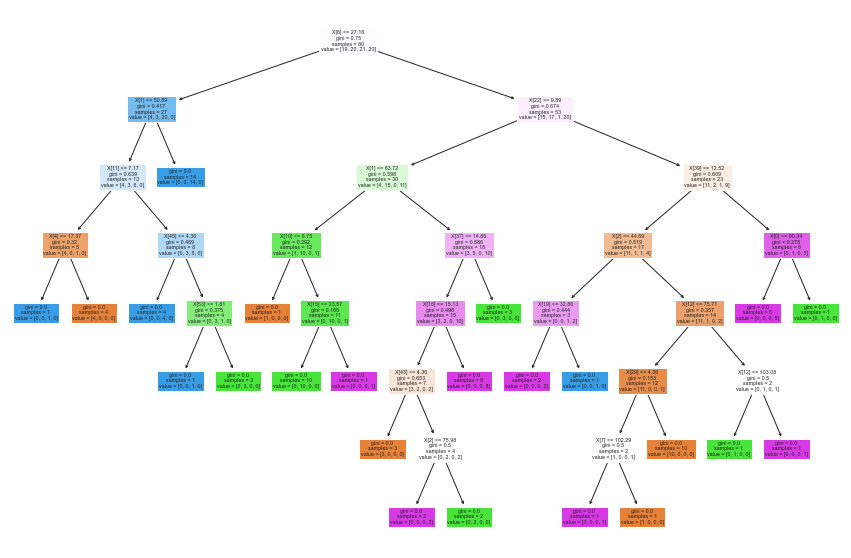

In [56]:
plt.figure(figsize = (15,10))
tree.plot_tree(clf, filled = True)

### Plotting tree

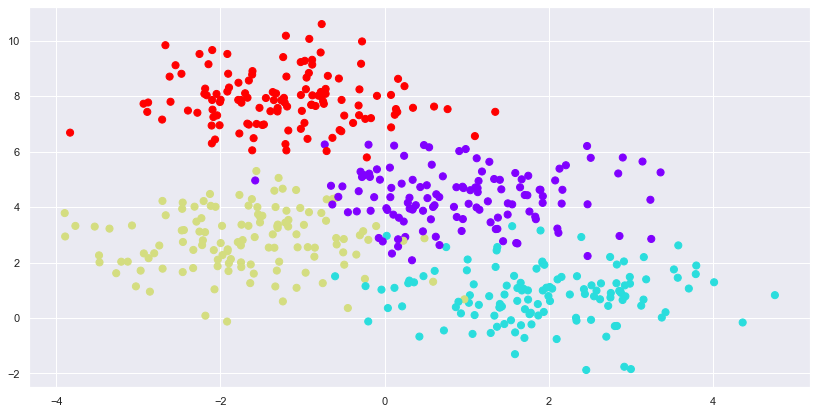

In [62]:
X, y = make_blobs(n_samples= 500, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [63]:
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

In [64]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=2,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

# Random Forest

### Fitting the model Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)


In [93]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 2.692
Avg Bias: 1.683
Avg Variance: 1.009
Mean Square error by Sckit-learn lib: 2.050


### Probability

In [66]:
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.35

### Recall, F1 score and Accuracy matrix

In [67]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.14      0.20      0.17         5
           2       0.67      0.50      0.57         4
           3       0.25      0.40      0.31         5

    accuracy                           0.35        20
   macro avg       0.51      0.36      0.39        20
weighted avg       0.53      0.35      0.38        20



### Confusion matrix

In [68]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[2 2 1 1]
 [0 1 0 4]
 [0 1 2 1]
 [0 3 0 2]]


### Visualizati0n

/Users/amad/fig_code/figures.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')


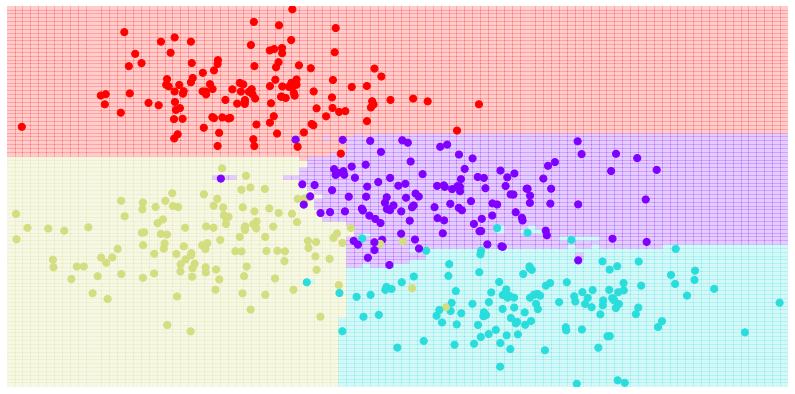

In [69]:
visualize_tree(clf, X, y, boundaries=False);

### Random forest Regressor

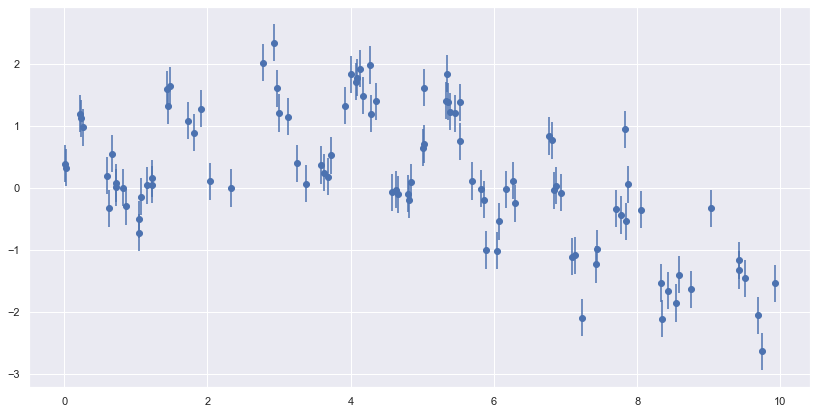

In [73]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


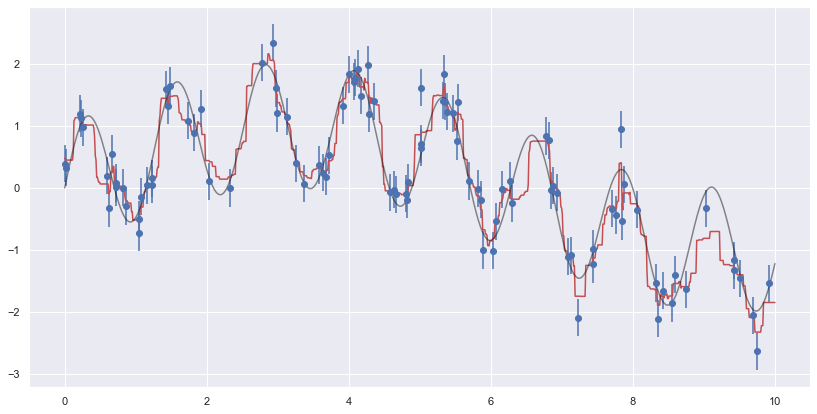

In [74]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);